# Cobining MSR, Meteoschweiz, Omega data and plotting them

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from matplotlib.dates import DateFormatter
import numpy as np


In [2]:
#check which is the current working directory
os.getcwd()

'/Users/dtg1/MeineDokumente/BFH/013_Python/RHTData'

In [3]:
#if necessary, change directory
os.chdir('00_Alldata')

In [4]:
os.getcwd()

'/Users/dtg1/MeineDokumente/BFH/013_Python/RHTData/00_Alldata'

## Import csv data from the MRS dataloggers

In [10]:
#import csv file with MRS data
df = pd.read_csv('MRS_Georg_Laurenz.csv', header=[0], sep=',')

In [11]:
#checking how many rows and columns
df.shape

(76875, 18)

In [12]:
#checking the names of columns
df.columns

Index(['date_Georg_W', 'RH_Georg_W', 'T_Georg_W', 'date_Georg_RS',
       'RH_Georg_RS', 'T_Georg_RS', 'date_Georg_G', 'RH_Georg_G', 'T_Georg_G',
       'date_Laurenz_W', 'RH_Laurenz_W', 'T_Laurenz_W', 'date_LaurenzRS',
       'RH_Laurenz_RS', 'T_Laurenz_RS', 'date_Laurenz_G', 'RH_Laurenz_G',
       'T_Laurenz_G'],
      dtype='object')

In [13]:
#renaming columns 
df.rename(columns={"date_LaurenzRS": "date_Laurenz_RS"}, inplace=True)
df.columns

Index(['date_Georg_W', 'RH_Georg_W', 'T_Georg_W', 'date_Georg_RS',
       'RH_Georg_RS', 'T_Georg_RS', 'date_Georg_G', 'RH_Georg_G', 'T_Georg_G',
       'date_Laurenz_W', 'RH_Laurenz_W', 'T_Laurenz_W', 'date_Laurenz_RS',
       'RH_Laurenz_RS', 'T_Laurenz_RS', 'date_Laurenz_G', 'RH_Laurenz_G',
       'T_Laurenz_G'],
      dtype='object')

In [14]:
df

,date_Georg_W,RH_Georg_W,T_Georg_W,date_Georg_RS,RH_Georg_RS,T_Georg_RS,date_Georg_G,RH_Georg_G,T_Georg_G,date_Laurenz_W,RH_Laurenz_W,T_Laurenz_W,date_Laurenz_RS,RH_Laurenz_RS,T_Laurenz_RS,date_Laurenz_G,RH_Laurenz_G,T_Laurenz_G
0,2021-12-14 11:00:00.057,42.3,6.1,2021-12-14 11:00:00.051,43.6,6.7,2021-12-14 11:00:00.043,42.8,6.9,2021-12-14 11:00:00.053,41.8,6.9,2021-12-14 11:00:00.049,39.1,7.3,2021-12-14 11:00:00.057,42.8,7.5
1,2021-12-14 11:10:00.057,60.0,4.8,2021-12-14 11:10:00.051,59.6,5.3,2021-12-14 11:10:00.043,61.1,5.1,2021-12-14 11:10:00.053,57.1,5.7,2021-12-14 11:10:00.049,63.0,7.4,2021-12-14 11:10:00.057,60.8,7.1
2,2021-12-14 11:20:00.057,62.7,4.7,2021-12-14 11:20:00.051,62.8,4.8,2021-12-14 11:20:00.043,64.2,4.7,2021-12-14 11:20:00.053,60.9,5.0,2021-12-14 11:20:00.049,56.5,6.8,2021-12-14 11:20:00.057,62.4,6.4
3,2021-12-14 11:30:00.057,64.8,4.7,2021-12-14 11:30:00.051,65.1,4.7,2021-12-14 11:30:00.043,65.5,4.6,2021-12-14 11:30:00.053,48.6,5.6,2021-12-14 11:30:00.049,62.8,6.6,2021-12-14 11:30:00.057,67.7,9.5
4,2021-12-14 11:40:00.057,64.9,4.8,2021-12-14 11:40:00.051,65.6,4.7,2021-12-14 11:40:00.043,66.4,4.6,2021-12-14 11:40:00.053,59.8,5.3,2021-12-14 11:40:00.049,65.9,7.6,2021-12-14 11:40:00.057,64.0,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76870,2023-06-01 10:40:00.047,48.4,21.6,2023-06-01 10:20:00.049,53.8,21.3,2023-06-01 10:10:00.055,54.0,21.2,2023-06-01 09:40:00.049,50.4,22.9,2023-06-01 09:40:00.049,51.0,22.6,2023-06-01 09:40:00.045,51.0,22.3
76871,2023-06-01 10:50:00.047,47.3,21.6,2023-06-01 10:30:00.049,52.8,21.3,2023-06-01 10:20:00.055,53.5,21.2,2023-06-01 09:50:00.049,51.5,24.5,2023-06-01 09:50:00.049,48.5,23.2,2023-06-01 09:50:00.045,51.4,22.9
76872,2023-06-01 11:00:00.047,46.7,21.7,2023-06-01 10:40:00.049,52.1,21.5,2023-06-01 10:30:00.055,52.8,21.3,2023-06-01 10:00:00.049,52.0,21.9,2023-06-01 10:00:00.049,52.1,21.1,2023-06-01 10:00:00.045,51.5,21.6
76873,2023-06-01 11:10:00.047,46.0,21.9,2023-06-01 10:50:00.049,51.4,21.5,2023-06-01 10:40:00.055,52.2,21.4,2023-06-01 10:10:00.049,52.6,21.3,2023-06-01 10:10:00.049,52.7,21.2,2023-06-01 10:10:00.045,52.3,21.3


## Import csv file with data from meteoschweiz

In [15]:
#import csv file with ms data
df_ms=pd.read_csv('RHTout.csv', header=[0], sep=',')

In [16]:
df_ms.shape
df_ms

,T out,RH out,DP out,a
0,2021-12-14 00:00:00,1.7,98.4,1.5
1,2021-12-14 00:10:00,1.5,97.7,1.2
2,2021-12-14 00:20:00,1.6,97.8,1.3
3,2021-12-14 00:30:00,1.4,98.6,1.2
4,2021-12-14 00:40:00,1.4,98.5,1.2
...,...,...,...,...
77035,2023-06-01 23:10:00,15.0,83.7,12.3
77036,2023-06-01 23:20:00,15.0,83.0,12.1
77037,2023-06-01 23:30:00,15.0,83.2,12.2
77038,2023-06-01 23:40:00,14.9,83.8,12.2


In [17]:
df_ms.rename(columns={"T out": "time out","RH out":"T out", "DP out": "RH out","a":"DP out"}, inplace=True)
df_ms

,time out,T out,RH out,DP out
0,2021-12-14 00:00:00,1.7,98.4,1.5
1,2021-12-14 00:10:00,1.5,97.7,1.2
2,2021-12-14 00:20:00,1.6,97.8,1.3
3,2021-12-14 00:30:00,1.4,98.6,1.2
4,2021-12-14 00:40:00,1.4,98.5,1.2
...,...,...,...,...
77035,2023-06-01 23:10:00,15.0,83.7,12.3
77036,2023-06-01 23:20:00,15.0,83.0,12.1
77037,2023-06-01 23:30:00,15.0,83.2,12.2
77038,2023-06-01 23:40:00,14.9,83.8,12.2


## Import data from the Omega datalogger

In [18]:
#import csv file with omega data
df_omega=pd.read_csv('RHT_room.csv', header=[0], sep=',')

In [19]:
print(df_omega.shape)
df_omega.rename(columns={"temperature room": "T room"}, inplace=True)
print(df_omega.at[0,"time room"],type(df_omega.at[0,"time room"]))
df_omega

(44205, 4)
2021-12-14 11:10:00 <class 'str'>


,time room,T room,RH room,DP room
0,2021-12-14 11:10:00,7.44044,54.4134,-1.166690
1,2021-12-14 11:20:00,7.06507,56.5420,-0.993034
2,2021-12-14 11:30:00,6.86129,58.0450,-0.825118
3,2021-12-14 11:40:00,6.77549,58.9376,-0.696661
4,2021-12-14 11:50:00,6.76476,59.9065,-0.482998
...,...,...,...,...
44200,2022-10-17 12:40:00,16.22430,73.0291,11.384200
44201,2022-10-17 12:50:00,16.28860,72.8994,11.419300
44202,2022-10-17 13:00:00,16.49240,73.2198,11.681900
44203,2022-10-17 13:10:00,17.13590,71.3354,11.905500


## Combining the three dataframes

In [20]:
# concatenating horizontally the three dataframes
df_all=pd.concat([df,df_omega,df_ms], axis = 1)
df_all

,date_Georg_W,RH_Georg_W,T_Georg_W,date_Georg_RS,RH_Georg_RS,T_Georg_RS,date_Georg_G,RH_Georg_G,T_Georg_G,date_Laurenz_W,...,RH_Laurenz_G,T_Laurenz_G,time room,T room,RH room,DP room,time out,T out,RH out,DP out
0,2021-12-14 11:00:00.057,42.3,6.1,2021-12-14 11:00:00.051,43.6,6.7,2021-12-14 11:00:00.043,42.8,6.9,2021-12-14 11:00:00.053,...,42.8,7.5,2021-12-14 11:10:00,7.44044,54.4134,-1.166690,2021-12-14 00:00:00,1.7,98.4,1.5
1,2021-12-14 11:10:00.057,60.0,4.8,2021-12-14 11:10:00.051,59.6,5.3,2021-12-14 11:10:00.043,61.1,5.1,2021-12-14 11:10:00.053,...,60.8,7.1,2021-12-14 11:20:00,7.06507,56.5420,-0.993034,2021-12-14 00:10:00,1.5,97.7,1.2
2,2021-12-14 11:20:00.057,62.7,4.7,2021-12-14 11:20:00.051,62.8,4.8,2021-12-14 11:20:00.043,64.2,4.7,2021-12-14 11:20:00.053,...,62.4,6.4,2021-12-14 11:30:00,6.86129,58.0450,-0.825118,2021-12-14 00:20:00,1.6,97.8,1.3
3,2021-12-14 11:30:00.057,64.8,4.7,2021-12-14 11:30:00.051,65.1,4.7,2021-12-14 11:30:00.043,65.5,4.6,2021-12-14 11:30:00.053,...,67.7,9.5,2021-12-14 11:40:00,6.77549,58.9376,-0.696661,2021-12-14 00:30:00,1.4,98.6,1.2
4,2021-12-14 11:40:00.057,64.9,4.8,2021-12-14 11:40:00.051,65.6,4.7,2021-12-14 11:40:00.043,66.4,4.6,2021-12-14 11:40:00.053,...,64.0,7.9,2021-12-14 11:50:00,6.76476,59.9065,-0.482998,2021-12-14 00:40:00,1.4,98.5,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:10:00,15.0,83.7,12.3
77036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:20:00,15.0,83.0,12.1
77037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:30:00,15.0,83.2,12.2
77038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:40:00,14.9,83.8,12.2


## Getting rid of NaN
It is important to get rid of NaN otherwise the series cannot be plotted. The date columns have to retain a date format, while the other values can be set to zero

In [21]:
#nan values are floats
print(df_all.loc[77035,'date_Georg_W'],type(df_all.loc[77035,'date_Georg_W']))

nan <class 'float'>


In [22]:
#slicing df_all for all MSR dates that are NaN
df_all.loc[df_all['date_Georg_W'].isna(),:]

,date_Georg_W,RH_Georg_W,T_Georg_W,date_Georg_RS,RH_Georg_RS,T_Georg_RS,date_Georg_G,RH_Georg_G,T_Georg_G,date_Laurenz_W,...,RH_Laurenz_G,T_Laurenz_G,time room,T room,RH room,DP room,time out,T out,RH out,DP out
76875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31 20:30:00,18.2,47.7,6.9
76876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31 20:40:00,18.0,50.1,7.5
76877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31 20:50:00,17.6,52.1,7.7
76878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31 21:00:00,17.5,52.0,7.5
76879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31 21:10:00,17.3,52.9,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:10:00,15.0,83.7,12.3
77036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:20:00,15.0,83.0,12.1
77037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:30:00,15.0,83.2,12.2
77038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:40:00,14.9,83.8,12.2


In [23]:
#exploring which is the last date not NaN for MSR dataloggers
df_all.loc[76874,:]

date_Georg_W       2023-06-01 11:20:00.047
RH_Georg_W                            45.5
T_Georg_W                             21.9
date_Georg_RS      2023-06-01 11:00:00.049
RH_Georg_RS                           50.9
T_Georg_RS                            21.6
date_Georg_G       2023-06-01 10:50:00.055
RH_Georg_G                            51.5
T_Georg_G                             21.5
date_Laurenz_W     2023-06-01 10:20:00.049
RH_Laurenz_W                          52.2
T_Laurenz_W                           21.4
date_Laurenz_RS    2023-06-01 10:20:00.049
RH_Laurenz_RS                         51.8
T_Laurenz_RS                          21.4
date_Laurenz_G     2023-06-01 10:20:00.045
RH_Laurenz_G                          51.8
T_Laurenz_G                           21.3
time room                              NaN
T room                                 NaN
RH room                                NaN
DP room                                NaN
time out               2023-05-31 20:20:00
T out      

In [24]:
# Look at the syntax!! I redefine the values of the cells by slicing for all the MSR date rows that are NaN
# -actually only the date row for Georg_W but they are all similar, so it works
# and by setting for all the rows of the list of columns name a certain value= the last recorded value
# This is necessary to avoid problems when I plot the data: NaN values cannot be plotted and the date
# columns have to retain a date format

df_all.loc[df_all['date_Georg_W'].isna(),['date_Georg_W','date_Georg_RS','date_Georg_G','date_Laurenz_W','date_Laurenz_RS','date_Laurenz_G']] = '2023-06-01 11:20:00.047'
df_all

,date_Georg_W,RH_Georg_W,T_Georg_W,date_Georg_RS,RH_Georg_RS,T_Georg_RS,date_Georg_G,RH_Georg_G,T_Georg_G,date_Laurenz_W,...,RH_Laurenz_G,T_Laurenz_G,time room,T room,RH room,DP room,time out,T out,RH out,DP out
0,2021-12-14 11:00:00.057,42.3,6.1,2021-12-14 11:00:00.051,43.6,6.7,2021-12-14 11:00:00.043,42.8,6.9,2021-12-14 11:00:00.053,...,42.8,7.5,2021-12-14 11:10:00,7.44044,54.4134,-1.166690,2021-12-14 00:00:00,1.7,98.4,1.5
1,2021-12-14 11:10:00.057,60.0,4.8,2021-12-14 11:10:00.051,59.6,5.3,2021-12-14 11:10:00.043,61.1,5.1,2021-12-14 11:10:00.053,...,60.8,7.1,2021-12-14 11:20:00,7.06507,56.5420,-0.993034,2021-12-14 00:10:00,1.5,97.7,1.2
2,2021-12-14 11:20:00.057,62.7,4.7,2021-12-14 11:20:00.051,62.8,4.8,2021-12-14 11:20:00.043,64.2,4.7,2021-12-14 11:20:00.053,...,62.4,6.4,2021-12-14 11:30:00,6.86129,58.0450,-0.825118,2021-12-14 00:20:00,1.6,97.8,1.3
3,2021-12-14 11:30:00.057,64.8,4.7,2021-12-14 11:30:00.051,65.1,4.7,2021-12-14 11:30:00.043,65.5,4.6,2021-12-14 11:30:00.053,...,67.7,9.5,2021-12-14 11:40:00,6.77549,58.9376,-0.696661,2021-12-14 00:30:00,1.4,98.6,1.2
4,2021-12-14 11:40:00.057,64.9,4.8,2021-12-14 11:40:00.051,65.6,4.7,2021-12-14 11:40:00.043,66.4,4.6,2021-12-14 11:40:00.053,...,64.0,7.9,2021-12-14 11:50:00,6.76476,59.9065,-0.482998,2021-12-14 00:40:00,1.4,98.5,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77035,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:10:00,15.0,83.7,12.3
77036,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:20:00,15.0,83.0,12.1
77037,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:30:00,15.0,83.2,12.2
77038,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:40:00,14.9,83.8,12.2


In [25]:
# I repeat the same procedure for time room
df_all.loc[df_all['time room'].isna(),:]

,date_Georg_W,RH_Georg_W,T_Georg_W,date_Georg_RS,RH_Georg_RS,T_Georg_RS,date_Georg_G,RH_Georg_G,T_Georg_G,date_Laurenz_W,...,RH_Laurenz_G,T_Laurenz_G,time room,T room,RH room,DP room,time out,T out,RH out,DP out
44205,2022-10-17 12:10:00.049,76.4,15.1,2022-10-17 12:20:00.055,75.4,15.7,2022-10-17 12:10:00.045,74.0,16.0,2022-10-17 11:50:00.045,...,73.5,15.1,NaN,NaN,NaN,NaN,2022-10-16 23:30:00,-,-,-
44206,2022-10-17 12:20:00.049,76.9,15.1,2022-10-17 12:30:00.055,75.4,15.7,2022-10-17 12:20:00.045,74.1,16.1,2022-10-17 12:00:00.045,...,73.5,15.2,NaN,NaN,NaN,NaN,2022-10-16 23:40:00,-,-,-
44207,2022-10-17 12:30:00.049,77.3,15.1,2022-10-17 12:40:00.055,75.4,15.8,2022-10-17 12:30:00.045,74.2,16.1,2022-10-17 12:10:00.045,...,73.5,15.2,NaN,NaN,NaN,NaN,2022-10-16 23:50:00,-,-,-
44208,2022-10-17 12:40:00.049,77.2,15.1,2022-10-17 12:50:00.055,75.4,15.9,2022-10-17 12:40:00.045,74.1,16.2,2022-10-17 12:20:00.045,...,73.5,15.3,NaN,NaN,NaN,NaN,2022-10-17 00:00:00,-,-,-
44209,2022-10-17 12:50:00.049,77.5,15.2,2022-10-17 13:00:00.055,75.5,16.1,2022-10-17 12:50:00.045,74.1,16.3,2022-10-17 12:30:00.045,...,73.5,15.4,NaN,NaN,NaN,NaN,2022-10-17 00:10:00,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77035,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:10:00,15.0,83.7,12.3
77036,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:20:00,15.0,83.0,12.1
77037,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:30:00,15.0,83.2,12.2
77038,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 23:40:00,14.9,83.8,12.2


In [26]:
df_all.loc[44204,:]

date_Georg_W       2022-10-17 12:00:00.049
RH_Georg_W                            75.8
T_Georg_W                             15.0
date_Georg_RS      2022-10-17 12:10:00.055
RH_Georg_RS                           75.3
T_Georg_RS                            15.6
date_Georg_G       2022-10-17 12:00:00.045
RH_Georg_G                            74.1
T_Georg_G                             15.9
date_Laurenz_W     2022-10-17 11:40:00.045
RH_Laurenz_W                          75.9
T_Laurenz_W                           15.1
date_Laurenz_RS    2022-10-17 12:00:00.053
RH_Laurenz_RS                         74.8
T_Laurenz_RS                          15.1
date_Laurenz_G     2022-10-17 11:40:00.053
RH_Laurenz_G                          73.5
T_Laurenz_G                           15.1
time room              2022-10-17 13:20:00
T room                             16.6104
RH room                            72.6629
DP room                            11.6798
time out               2022-10-16 23:20:00
T out      

In [27]:
df_all.loc[df_all['time room'].isna(),['time room']] = '2022-10-17 13:20:00'
df_all

,date_Georg_W,RH_Georg_W,T_Georg_W,date_Georg_RS,RH_Georg_RS,T_Georg_RS,date_Georg_G,RH_Georg_G,T_Georg_G,date_Laurenz_W,...,RH_Laurenz_G,T_Laurenz_G,time room,T room,RH room,DP room,time out,T out,RH out,DP out
0,2021-12-14 11:00:00.057,42.3,6.1,2021-12-14 11:00:00.051,43.6,6.7,2021-12-14 11:00:00.043,42.8,6.9,2021-12-14 11:00:00.053,...,42.8,7.5,2021-12-14 11:10:00,7.44044,54.4134,-1.166690,2021-12-14 00:00:00,1.7,98.4,1.5
1,2021-12-14 11:10:00.057,60.0,4.8,2021-12-14 11:10:00.051,59.6,5.3,2021-12-14 11:10:00.043,61.1,5.1,2021-12-14 11:10:00.053,...,60.8,7.1,2021-12-14 11:20:00,7.06507,56.5420,-0.993034,2021-12-14 00:10:00,1.5,97.7,1.2
2,2021-12-14 11:20:00.057,62.7,4.7,2021-12-14 11:20:00.051,62.8,4.8,2021-12-14 11:20:00.043,64.2,4.7,2021-12-14 11:20:00.053,...,62.4,6.4,2021-12-14 11:30:00,6.86129,58.0450,-0.825118,2021-12-14 00:20:00,1.6,97.8,1.3
3,2021-12-14 11:30:00.057,64.8,4.7,2021-12-14 11:30:00.051,65.1,4.7,2021-12-14 11:30:00.043,65.5,4.6,2021-12-14 11:30:00.053,...,67.7,9.5,2021-12-14 11:40:00,6.77549,58.9376,-0.696661,2021-12-14 00:30:00,1.4,98.6,1.2
4,2021-12-14 11:40:00.057,64.9,4.8,2021-12-14 11:40:00.051,65.6,4.7,2021-12-14 11:40:00.043,66.4,4.6,2021-12-14 11:40:00.053,...,64.0,7.9,2021-12-14 11:50:00,6.76476,59.9065,-0.482998,2021-12-14 00:40:00,1.4,98.5,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77035,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,...,NaN,NaN,2022-10-17 13:20:00,NaN,NaN,NaN,2023-06-01 23:10:00,15.0,83.7,12.3
77036,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,...,NaN,NaN,2022-10-17 13:20:00,NaN,NaN,NaN,2023-06-01 23:20:00,15.0,83.0,12.1
77037,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,...,NaN,NaN,2022-10-17 13:20:00,NaN,NaN,NaN,2023-06-01 23:30:00,15.0,83.2,12.2
77038,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,NaN,NaN,2023-06-01 11:20:00.047,...,NaN,NaN,2022-10-17 13:20:00,NaN,NaN,NaN,2023-06-01 23:40:00,14.9,83.8,12.2


In [28]:
# Now I substitute all remaining NaN values with 0 with the function fillna

df_all=df_all.fillna(0)
df_all

,date_Georg_W,RH_Georg_W,T_Georg_W,date_Georg_RS,RH_Georg_RS,T_Georg_RS,date_Georg_G,RH_Georg_G,T_Georg_G,date_Laurenz_W,...,RH_Laurenz_G,T_Laurenz_G,time room,T room,RH room,DP room,time out,T out,RH out,DP out
0,2021-12-14 11:00:00.057,42.3,6.1,2021-12-14 11:00:00.051,43.6,6.7,2021-12-14 11:00:00.043,42.8,6.9,2021-12-14 11:00:00.053,...,42.8,7.5,2021-12-14 11:10:00,7.44044,54.4134,-1.166690,2021-12-14 00:00:00,1.7,98.4,1.5
1,2021-12-14 11:10:00.057,60.0,4.8,2021-12-14 11:10:00.051,59.6,5.3,2021-12-14 11:10:00.043,61.1,5.1,2021-12-14 11:10:00.053,...,60.8,7.1,2021-12-14 11:20:00,7.06507,56.5420,-0.993034,2021-12-14 00:10:00,1.5,97.7,1.2
2,2021-12-14 11:20:00.057,62.7,4.7,2021-12-14 11:20:00.051,62.8,4.8,2021-12-14 11:20:00.043,64.2,4.7,2021-12-14 11:20:00.053,...,62.4,6.4,2021-12-14 11:30:00,6.86129,58.0450,-0.825118,2021-12-14 00:20:00,1.6,97.8,1.3
3,2021-12-14 11:30:00.057,64.8,4.7,2021-12-14 11:30:00.051,65.1,4.7,2021-12-14 11:30:00.043,65.5,4.6,2021-12-14 11:30:00.053,...,67.7,9.5,2021-12-14 11:40:00,6.77549,58.9376,-0.696661,2021-12-14 00:30:00,1.4,98.6,1.2
4,2021-12-14 11:40:00.057,64.9,4.8,2021-12-14 11:40:00.051,65.6,4.7,2021-12-14 11:40:00.043,66.4,4.6,2021-12-14 11:40:00.053,...,64.0,7.9,2021-12-14 11:50:00,6.76476,59.9065,-0.482998,2021-12-14 00:40:00,1.4,98.5,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77035,2023-06-01 11:20:00.047,0.0,0.0,2023-06-01 11:20:00.047,0.0,0.0,2023-06-01 11:20:00.047,0.0,0.0,2023-06-01 11:20:00.047,...,0.0,0.0,2022-10-17 13:20:00,0.00000,0.0000,0.000000,2023-06-01 23:10:00,15.0,83.7,12.3
77036,2023-06-01 11:20:00.047,0.0,0.0,2023-06-01 11:20:00.047,0.0,0.0,2023-06-01 11:20:00.047,0.0,0.0,2023-06-01 11:20:00.047,...,0.0,0.0,2022-10-17 13:20:00,0.00000,0.0000,0.000000,2023-06-01 23:20:00,15.0,83.0,12.1
77037,2023-06-01 11:20:00.047,0.0,0.0,2023-06-01 11:20:00.047,0.0,0.0,2023-06-01 11:20:00.047,0.0,0.0,2023-06-01 11:20:00.047,...,0.0,0.0,2022-10-17 13:20:00,0.00000,0.0000,0.000000,2023-06-01 23:30:00,15.0,83.2,12.2
77038,2023-06-01 11:20:00.047,0.0,0.0,2023-06-01 11:20:00.047,0.0,0.0,2023-06-01 11:20:00.047,0.0,0.0,2023-06-01 11:20:00.047,...,0.0,0.0,2022-10-17 13:20:00,0.00000,0.0000,0.000000,2023-06-01 23:40:00,14.9,83.8,12.2


In [29]:
df_all.columns

Index(['date_Georg_W', 'RH_Georg_W', 'T_Georg_W', 'date_Georg_RS',
       'RH_Georg_RS', 'T_Georg_RS', 'date_Georg_G', 'RH_Georg_G', 'T_Georg_G',
       'date_Laurenz_W', 'RH_Laurenz_W', 'T_Laurenz_W', 'date_Laurenz_RS',
       'RH_Laurenz_RS', 'T_Laurenz_RS', 'date_Laurenz_G', 'RH_Laurenz_G',
       'T_Laurenz_G', 'time room', 'T room', 'RH room', 'DP room', 'time out',
       'T out', 'RH out', 'DP out'],
      dtype='object')

## Plotting with object-oriented approach

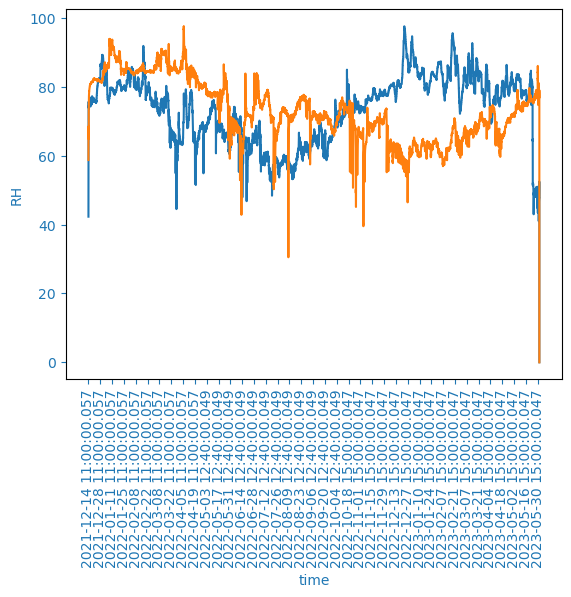

Duration: 0:00:04.174293


In [30]:
start_time = datetime.now()

x_values1=df_all['date_Georg_W']
y_values1=df_all['RH_Georg_W']

x_values2=df_all['time room']
y_values2=df_all['RH room']


fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(x_values1, y_values1, color="C0")
ax.set_xlabel("time", color="C0")
ax.set_ylabel("RH", color="C0")
ax.tick_params(axis='x', colors="C0",labelrotation=90)
ax.tick_params(axis='y', colors="C0")
ax.set_xticks(ax.get_xticks()[::2016])

ax2.plot(x_values2, y_values2, color="C1")
ax2.set_xticks([])
ax2.set_yticks([])


plt.show(block=False)

#fig.savefig('test.png', dpi=300)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

**problem: I know that the dataset of the Omega datalogger == the RH and T in the room is actually much shorter than the other dataset. nevertheless it is plotted across the whole x axes. Where is the mistake?**

Below just the code to plot all RH datas, same problem with the x-axes

In [ ]:
start_time = datetime.now()

x_values1=df_all['date_Georg_W']
y_values1=df_all['RH_Georg_W']

#x_values2=df_all['date_Georg_RS']
#y_values2=df_all['RH_Georg_RS']

#x_values3=df_all['date_Georg_G']
#y_values3=df_all['RH_Georg_G']

#x_values4=df_all['time room']
#y_values4=df_all['RH room']

#x_values5=df_all['time out']
#y_values5=df_all['RH out']


fig=plt.figure()
ax=fig.add_subplot(111, label="1")
#ax2=fig.add_subplot(111, label="2", frame_on=False)
#ax3=fig.add_subplot(111, label="3", frame_on=False)
#ax4=fig.add_subplot(111, label="4", frame_on=False)
#ax5=fig.add_subplot(111, label="5", frame_on=False)

ax.plot(x_values1, y_values1, color="C0")
ax.set_xlabel("time", color="C0")
ax.set_ylabel("RH", color="C0")
ax.tick_params(axis='x', colors="C0",labelrotation=90)
ax.tick_params(axis='y', colors="C0")
ax.set_xticks(ax.get_xticks()[::2016])


#formatter = DateFormatter('%H:%M')
#plt.gcf().axes[0].xaxis.set_major_formatter(formatter) 

#ax2.plot(x_values2, y_values2, color="C1")
#ax2.set_xticks([])
#ax2.set_yticks([])

#ax3.plot(x_values3, y_values3, color="C2")
#ax3.set_xticks([])
#ax3.set_yticks([])

#ax4.plot(x_values4, y_values4, color="C3")
#ax4.set_xticks([])
#ax4.set_yticks([])

#ax5.plot(x_values5, y_values5, color="C4")
#ax5.set_xticks([])
#ax5.set_yticks([])

plt.show(block=False)

fig.savefig('Georg_alltime.png', dpi=300)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

## Approach 2: creating a dataframe that has a single column with time
This is possible in this case without interpolation because the data are taken at almost the same times(difference less than 1 s). The problem is that the series have different lengths and some data are missing in some series (because data collection has been interrupted when downloading the dataloggers). Steps:
1. create a dataframe where the first column has times from start to end at 10 min intervals, all the other columns have zeros
2. consider a data serie and create a mask that has True if a measurement is present at a certain time, otherwise false
3. use this mask to fill the column of the dataframe

First I create an artifical short sequence of times and an artificial serie of data with some missing datas for those times

In [86]:
min_time=datetime(2021,12,14,11,0)
max_time=datetime(2021,12,14,11,50)
time_range = pd.date_range(min_time, max_time, freq='10 min')
time_range

DatetimeIndex(['2021-12-14 11:00:00', '2021-12-14 11:10:00',
               '2021-12-14 11:20:00', '2021-12-14 11:30:00',
               '2021-12-14 11:40:00', '2021-12-14 11:50:00'],
              dtype='datetime64[ns]', freq='10T')

In [87]:
df1 = pd.DataFrame(time_range).set_index(0)
df1

""
0
2021-12-14 11:00:00
2021-12-14 11:10:00
2021-12-14 11:20:00
2021-12-14 11:30:00
2021-12-14 11:40:00
2021-12-14 11:50:00


In [88]:
time_range_1=[datetime(2021, 12, 14, 11, 20),datetime(2021, 12, 14, 11, 30)]
df2=pd.DataFrame(time_range_1).set_index(0)
df2["RH"]=[45,65]
df2

,RH
0,
2021-12-14 11:20:00,45
2021-12-14 11:30:00,65


In [89]:
time_range_1=[datetime(2021, 12, 14, 11, 40),datetime(2021, 12, 14, 11, 50)]
df3=pd.DataFrame(time_range_1).set_index(0)
df3["RH2"]=[20,30]
df3

,RH2
0,
2021-12-14 11:40:00,20
2021-12-14 11:50:00,30


In [90]:
df4=df1.join(df2)
df4

,RH
0,
2021-12-14 11:00:00,NaN
2021-12-14 11:10:00,NaN
2021-12-14 11:20:00,45.0
2021-12-14 11:30:00,65.0
2021-12-14 11:40:00,NaN
2021-12-14 11:50:00,NaN


In [91]:
df5=df4.join(df3)
df5

,RH,RH2
0,,
2021-12-14 11:00:00,NaN,NaN
2021-12-14 11:10:00,NaN,NaN
2021-12-14 11:20:00,45.0,NaN
2021-12-14 11:30:00,65.0,NaN
2021-12-14 11:40:00,NaN,20.0
2021-12-14 11:50:00,NaN,30.0


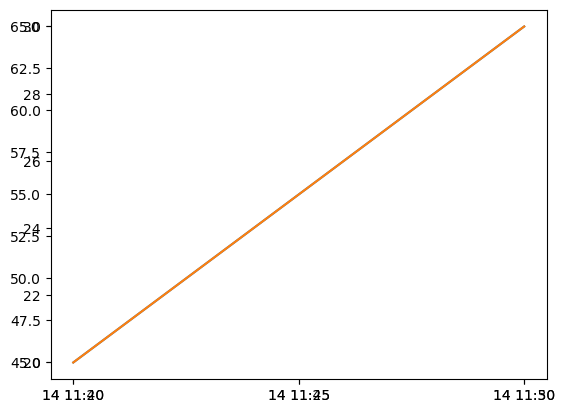

In [93]:
x_v=df5.index
y_v=df5['RH']

x_v2=df5.index
y_v2=df5['RH2']

fig2=plt.figure()
ax6=fig2.add_subplot(111, label="1")
ax7=fig2.add_subplot(111, label="2", frame_on=False)

ax6.plot(x_v, y_v, color="C0")
ax7.plot(x_v2, y_v2, color="C1")


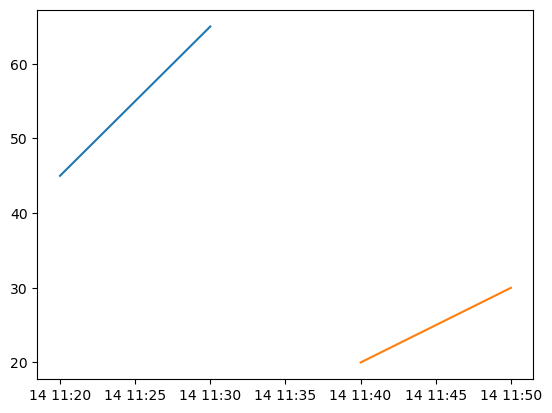

In [94]:
plt.plot(df5.index, df5['RH'])
plt.plot(df5.index, df5['RH2'])


ABOVE I CAN PLOT THE TWO SERIES IN A SINGLE PLOT, WHY BEFORE IT DOES NOT WORK??

##  how to place the xticks and labelling them
I want to have the xticks at the right place and they should have shorter labels

In [31]:
df_small=df_all.loc[0:1000,:]
df_small

,date_Georg_W,RH_Georg_W,T_Georg_W,date_Georg_RS,RH_Georg_RS,T_Georg_RS,date_Georg_G,RH_Georg_G,T_Georg_G,date_Laurenz_W,...,RH_Laurenz_G,T_Laurenz_G,time room,T room,RH room,DP room,time out,T out,RH out,DP out
0,2021-12-14 11:00:00.057,42.3,6.1,2021-12-14 11:00:00.051,43.6,6.7,2021-12-14 11:00:00.043,42.8,6.9,2021-12-14 11:00:00.053,...,42.8,7.5,2021-12-14 11:10:00,7.440440,54.4134,-1.166690,2021-12-14 00:00:00,1.7,98.4,1.5
1,2021-12-14 11:10:00.057,60.0,4.8,2021-12-14 11:10:00.051,59.6,5.3,2021-12-14 11:10:00.043,61.1,5.1,2021-12-14 11:10:00.053,...,60.8,7.1,2021-12-14 11:20:00,7.065070,56.5420,-0.993034,2021-12-14 00:10:00,1.5,97.7,1.2
2,2021-12-14 11:20:00.057,62.7,4.7,2021-12-14 11:20:00.051,62.8,4.8,2021-12-14 11:20:00.043,64.2,4.7,2021-12-14 11:20:00.053,...,62.4,6.4,2021-12-14 11:30:00,6.861290,58.0450,-0.825118,2021-12-14 00:20:00,1.6,97.8,1.3
3,2021-12-14 11:30:00.057,64.8,4.7,2021-12-14 11:30:00.051,65.1,4.7,2021-12-14 11:30:00.043,65.5,4.6,2021-12-14 11:30:00.053,...,67.7,9.5,2021-12-14 11:40:00,6.775490,58.9376,-0.696661,2021-12-14 00:30:00,1.4,98.6,1.2
4,2021-12-14 11:40:00.057,64.9,4.8,2021-12-14 11:40:00.051,65.6,4.7,2021-12-14 11:40:00.043,66.4,4.6,2021-12-14 11:40:00.053,...,64.0,7.9,2021-12-14 11:50:00,6.764760,59.9065,-0.482998,2021-12-14 00:40:00,1.4,98.5,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2021-12-21 09:00:00.057,76.2,1.2,2021-12-21 09:00:00.051,68.1,1.0,2021-12-21 09:00:00.043,68.4,0.9,2021-12-21 09:00:00.053,...,77.4,0.8,2021-12-21 09:10:00,0.898135,75.8825,-2.876410,2021-12-20 22:00:00,-1.9,93.8,-2.8
997,2021-12-21 09:10:00.057,76.2,1.1,2021-12-21 09:10:00.051,68.2,1.0,2021-12-21 09:10:00.043,68.4,0.9,2021-12-21 09:10:00.053,...,77.4,0.8,2021-12-21 09:20:00,0.898135,75.8825,-2.876410,2021-12-20 22:10:00,-2.0,94.5,-2.8
998,2021-12-21 09:20:00.057,76.2,1.1,2021-12-21 09:20:00.051,68.2,1.0,2021-12-21 09:20:00.043,68.4,0.9,2021-12-21 09:20:00.053,...,77.4,0.8,2021-12-21 09:30:00,0.887410,75.8825,-2.886810,2021-12-20 22:20:00,-2.1,95.2,-2.8
999,2021-12-21 09:30:00.057,76.2,1.1,2021-12-21 09:30:00.051,68.2,1.0,2021-12-21 09:30:00.043,68.4,0.9,2021-12-21 09:30:00.053,...,77.4,0.8,2021-12-21 09:40:00,0.887410,75.9359,-2.877330,2021-12-20 22:30:00,-2.1,95.2,-2.8


In [33]:
x_values1=df_small['date_Georg_W']
y_values1=df_small['RH_Georg_W']
x_values2=df_small['date_Georg_RS']
y_values2=df_small['RH_Georg_RS']

In [34]:
print(type(df_small["date_Georg_W"][0]),df_small["date_Georg_W"][0])

<class 'str'> 2021-12-14 11:00:00.057


In [35]:
subset=df_small.iloc[6::24*3, 0]
print(subset, "length is: " ,len(subset))

6      2021-12-14 12:00:00.057
78     2021-12-15 00:00:00.057
150    2021-12-15 12:00:00.057
222    2021-12-16 00:00:00.057
294    2021-12-16 12:00:00.057
366    2021-12-17 00:00:00.057
438    2021-12-17 12:00:00.057
510    2021-12-18 00:00:00.057
582    2021-12-18 12:00:00.057
654    2021-12-19 00:00:00.057
726    2021-12-19 12:00:00.057
798    2021-12-20 00:00:00.057
870    2021-12-20 12:00:00.057
942    2021-12-21 00:00:00.057
Name: date_Georg_W, dtype: object length is:  14


In [36]:
subset.iloc[0]

'2021-12-14 12:00:00.057'

In [37]:
xtickslabels=[]
for i in range(14):
    item=subset.iloc[i][:16]
    xtickslabels.append(item)
print(xtickslabels,"length is: " ,len(xtickslabels))

['2021-12-14 12:00', '2021-12-15 00:00', '2021-12-15 12:00', '2021-12-16 00:00', '2021-12-16 12:00', '2021-12-17 00:00', '2021-12-17 12:00', '2021-12-18 00:00', '2021-12-18 12:00', '2021-12-19 00:00', '2021-12-19 12:00', '2021-12-20 00:00', '2021-12-20 12:00', '2021-12-21 00:00'] length is:  14


Just to show that it is also possible to use list comprehension

In [38]:
xtickslabels=[subset.iloc[i][:16]for i in range(14)]
print(xtickslabels,"length is: " ,len(xtickslabels))

['2021-12-14 12:00', '2021-12-15 00:00', '2021-12-15 12:00', '2021-12-16 00:00', '2021-12-16 12:00', '2021-12-17 00:00', '2021-12-17 12:00', '2021-12-18 00:00', '2021-12-18 12:00', '2021-12-19 00:00', '2021-12-19 12:00', '2021-12-20 00:00', '2021-12-20 12:00', '2021-12-21 00:00'] length is:  14


In [39]:
xtickspos = print(list(range(6,1001,72)))

[6, 78, 150, 222, 294, 366, 438, 510, 582, 654, 726, 798, 870, 942]


TypeError: xticks(): Parameter 'labels' can't be set without setting 'ticks'

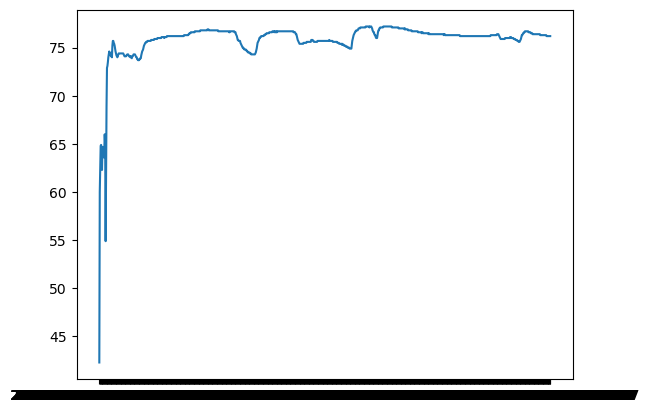

In [40]:
start_time = datetime.now()

fig,ax = plt.subplots()

x_values1=df_small['date_Georg_W']
y_values1=df_small['RH_Georg_W']

plt.plot(x_values1,y_values1)

plt.xticks(xtickspos,xtickslabels)

plt.show

#x_values2=df_small['date_Georg_RS']
#y_values2=df_small['RH_Georg_RS']

#x_values3=df_small['date_Georg_G']
#y_values3=df_small['RH_Georg_G']

#x_values4=df_small['time room']
#y_values4=df_smll['RH room']

#x_values5=df_all['time out']
#y_values5=df_all['RH out']



#fig=plt.figure()
#ax=fig.add_subplot(111, label="1")
#ax2=fig.add_subplot(111, label="2", frame_on=False)
#ax3=fig.add_subplot(111, label="3", frame_on=False)
#ax4=fig.add_subplot(111, label="4", frame_on=False)
#ax5=fig.add_subplot(111, label="5", frame_on=False)

#ax.plot(x_values1, y_values1, color="C0")
#ax.xlabel("time", color="C0")
#ax.ylabel("RH", color="C0")
#ax.xticks
#ax.tick_params(axis='x', colors="C0",labelrotation=90)
#ax.tick_params(axis='y', colors="C0")
#ax.set_xticks(ax.get_xticks()[::2016])


#formatter = DateFormatter('%H:%M')
#plt.gcf().axes[0].xaxis.set_major_formatter(formatter) 

#ax2.plot(x_values2, y_values2, color="C1")
#ax2.set_xticks([])
#ax2.set_yticks([])

#ax3.plot(x_values3, y_values3, color="C2")
#ax3.set_xticks([])
#ax3.set_yticks([])

#ax4.plot(x_values4, y_values4, color="C3")
#ax4.set_xticks([])
#ax4.set_yticks([])

#ax5.plot(x_values5, y_values5, color="C4")
#ax5.set_xticks([])
#ax5.set_yticks([])

#plt.show(block=False)

#fig.savefig('Georg_alltime.png', dpi=300)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

## Messy tests with datetime

In [241]:
from datetime import datetime,timedelta
start = datetime(2021,12,14,11)
print(start)
xticks_label =[]
for i in range(7):
    newlabel = start + timedelta(days=i)
    xticks_label.append(newlabel)
print(xticks_label)
print(xticks_label[6])

2021-12-14 11:00:00
[datetime.datetime(2021, 12, 14, 11, 0), datetime.datetime(2021, 12, 15, 11, 0), datetime.datetime(2021, 12, 16, 11, 0), datetime.datetime(2021, 12, 17, 11, 0), datetime.datetime(2021, 12, 18, 11, 0), datetime.datetime(2021, 12, 19, 11, 0), datetime.datetime(2021, 12, 20, 11, 0)]
2021-12-20 11:00:00


In [96]:
dateserie.remove(datetime(2021, 12, 14, 12, 10))
print(dateserie)
print(len(dateserie))

[datetime.datetime(2021, 12, 14, 11, 0), datetime.datetime(2021, 12, 14, 11, 10), datetime.datetime(2021, 12, 14, 11, 20), datetime.datetime(2021, 12, 14, 11, 30), datetime.datetime(2021, 12, 14, 11, 40), datetime.datetime(2021, 12, 14, 11, 50), datetime.datetime(2021, 12, 14, 12, 0), datetime.datetime(2021, 12, 14, 12, 20), datetime.datetime(2021, 12, 14, 12, 30)]
9
